<a href="https://colab.research.google.com/github/sanskruti-1234/Deep-Learning/blob/main/Practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [8]:
def generate_data(num_points, noise_level=1.0):
    np.random.seed(42)
    x = np.sort(5 * np.random.rand(num_points, 1), axis=0)
    y = np.sin(x) + 0.5 * x + np.random.randn(num_points, 1) * noise_level
    return x, y

In [7]:
def plot_model(x_train, y_train, x_test, y_test, poly_degree, model, ax):
    x_plot = np.linspace(0, 5, 500).reshape(-1, 1)
    poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
    x_plot_poly = poly_features.fit_transform(x_plot)
    y_plot_pred = model.predict(x_plot_poly)

    # Plot the data and the fitted curve
    ax.scatter(x_train, y_train, label='Training Data', color='blue', alpha=0.7)
    ax.scatter(x_test, y_test, label='Testing Data', color='red', alpha=0.7)
    ax.plot(x_plot, y_plot_pred, label=f'Polynomial Degree {poly_degree}', color='black', linewidth=2)

    # Calculate and display the mean squared error (MSE)
    train_pred = model.predict(poly_features.fit_transform(x_train))
    test_pred = model.predict(poly_features.fit_transform(x_test))

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    ax.set_title(f'Degree {poly_degree}\nTrain MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

In [15]:
def main():
    # 1. Generate synthetic data and split into training and testing sets
    num_points = 100
    x, y = generate_data(num_points, noise_level=1.2)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # 2. Define different polynomial degrees to demonstrate the concepts
    degrees = [1, 4, 15]
    fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
    plt.style.use('seaborn-v0_8-whitegrid')

    for i, degree in enumerate(degrees):
        print(f"Fitting model with polynomial degree: {degree}")

        # 3. Create polynomial features and fit the model
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        x_train_poly = poly_features.fit_transform(x_train)

        model = LinearRegression()
        model.fit(x_train_poly, y_train)

        # 4. Plot the results
        plot_model(x_train, y_train, x_test, y_test, degree, model, axes[i])

    # Add a main title for the whole figure
    fig.suptitle('Illustrating Underfitting, Good Fit, and Overfitting', fontsize=18)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Fitting model with polynomial degree: 1
Fitting model with polynomial degree: 4
Fitting model with polynomial degree: 15


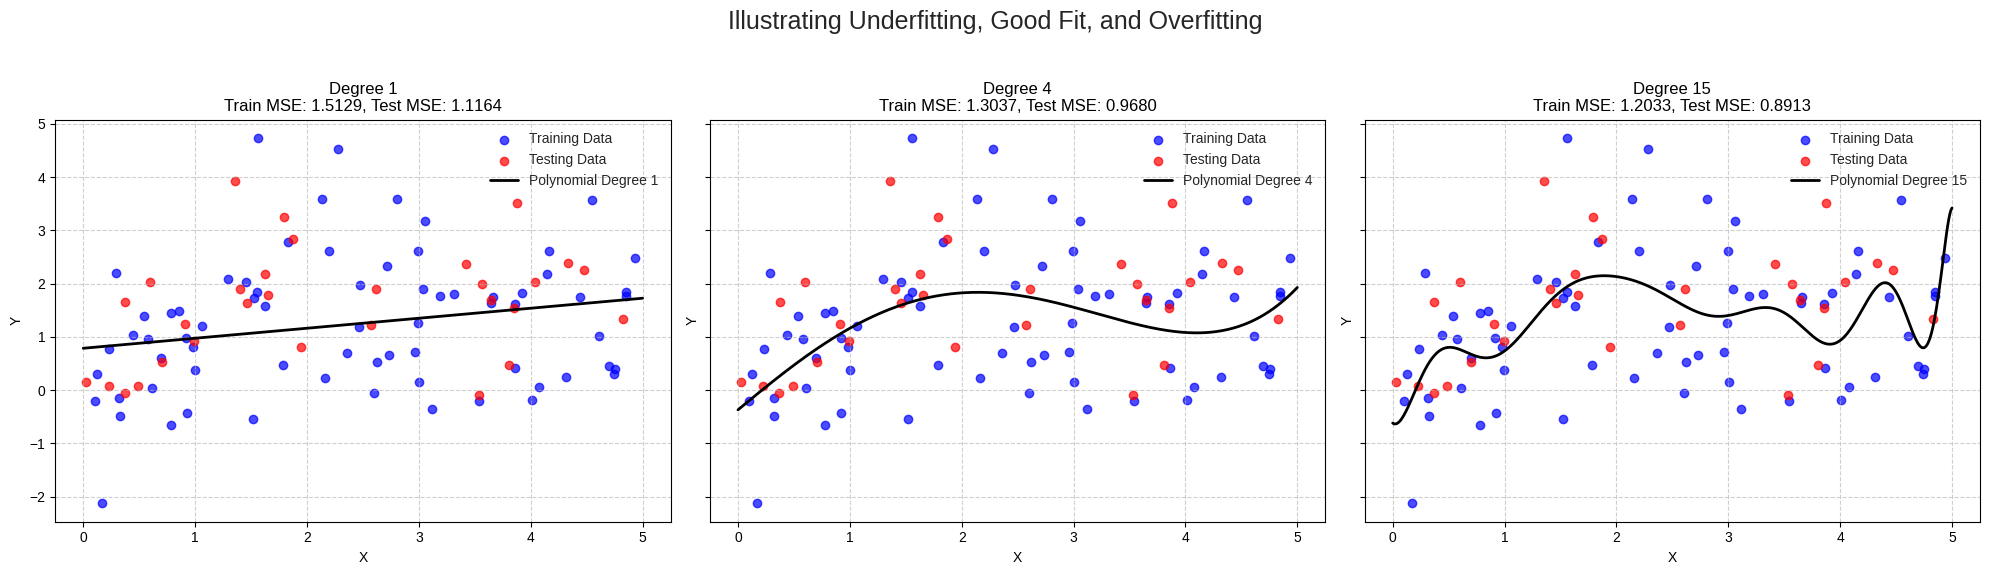

In [16]:
if __name__ == "__main__":
    main()
